# Q1) K-Nearest Neighbors (KNN) Classifier and Regression


### a) Load the Iris dataset, split it into training and testing sets, and implement a K-Nearest Neighbors Classifier to predict the flower species. Evaluate the model performance using accuracy and confusion matrix.

In [1]:
import pandas as pd
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None,
               names=['sepal_length','sepal_width','petal_length','petal_width','species'])

In [2]:
from sklearn.model_selection import train_test_split
X=df.drop('species',axis=1)
y=df['species']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,shuffle=True)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
k=KNeighborsClassifier()
k.fit(X_train,y_train)
y_pred=k.predict(X_test)
print(f"Accuracy is {accuracy_score(y_test,y_pred)}")
print(f"Confusion Matrix is :\n {confusion_matrix(y_test,y_pred)}")

Accuracy is 1.0
Confusion Matrix is :
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


### b) Experiment with different values of k (e.g., 3, 5, 7, 9) and plot how accuracy changes with k. Briefly explain the effect of k on model performance.

In [4]:
k1=KNeighborsClassifier(n_neighbors=3)
k1.fit(X_train,y_train)
y_pred=k1.predict(X_test)
accu1=accuracy_score(y_test,y_pred)

k2=KNeighborsClassifier(n_neighbors=5)
k2.fit(X_train,y_train)
y_pred=k2.predict(X_test)
accu2=accuracy_score(y_test,y_pred)

k3=KNeighborsClassifier(n_neighbors=7)
k3.fit(X_train,y_train)
y_pred=k3.predict(X_test)
accu3=accuracy_score(y_test,y_pred)

k4=KNeighborsClassifier(n_neighbors=9)
k4.fit(X_train,y_train)
y_pred=k4.predict(X_test)
accu4=accuracy_score(y_test,y_pred)

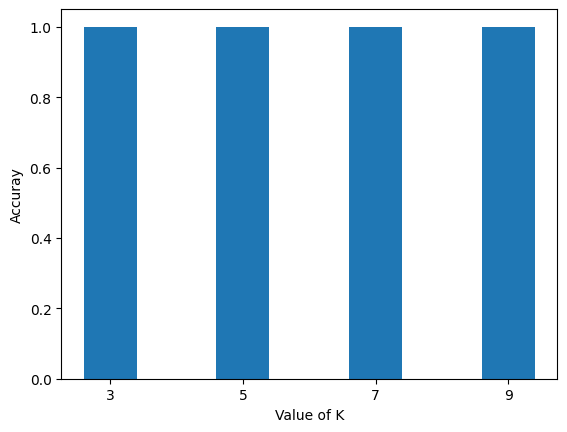

In [5]:
import matplotlib.pyplot as pl
x=[3,5,7,9]
y=[accu1,accu2,accu3,accu4]
pl.xlabel("Value of K")
pl.ylabel("Accuray")
pl.xticks(x)
pl.bar(x,y)
pl.show()

### c) Using the California Housing Dataset, implement a KNeighborsRegressor to predict median house prices. Evaluate the model using RMSE and R² score, and discuss the impact of n_neighbors on regression performance.

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
X,y=fetch_california_housing(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,shuffle=True)
r=KNeighborsRegressor()
r.fit(X_train,y_train)
y_pred=r.predict(X_test)
print(f"RMSE is {root_mean_squared_error(y_test,y_pred)}")
print(f"R2 score is {r2_score(y_test,y_pred)}")

r1=KNeighborsRegressor(n_neighbors=3)
r1.fit(X_train,y_train)
y_pred=r1.predict(X_test)
print(f"RMSE is {root_mean_squared_error(y_test,y_pred)}")
print(f"R2 score is {r2_score(y_test,y_pred)}")

r2=KNeighborsRegressor(n_neighbors=7)
r2.fit(X_train,y_train)
y_pred=r2.predict(X_test)
print(f"RMSE is {root_mean_squared_error(y_test,y_pred)}")
print(f"R2 score is {r2_score(y_test,y_pred)}")

r3=KNeighborsRegressor(n_neighbors=9)
r3.fit(X_train,y_train)
y_pred=r3.predict(X_test)
print(f"RMSE is {root_mean_squared_error(y_test,y_pred)}")
print(f"R2 score is {r2_score(y_test,y_pred)}")

RMSE is 1.0640592412378382
R2 score is 0.14434206676911643
RMSE is 1.0916672624057806
R2 score is 0.09936433957213608
RMSE is 1.0576176259351788
R2 score is 0.15467069371590192
RMSE is 1.060059975888558
R2 score is 0.15076195805631398


# Q2) Naive Bayes with Mixed Numeric and Categorical Features

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelBinarizer,KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

### a) Load and preprocess the dataset by handling missing values, encoding categorical variables (e.g., using OneHotEncoder), and scaling numeric variables (using StandardScaler).

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
cols = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status","occupation", "relationship", "race", "sex",
         "capital_gain", "capital_loss","hours_per_week", "native_country", "income"]

df = pd.read_csv(url, names=cols, na_values=" ?", skipinitialspace=True)

X = df.drop("income", axis=1)
y = LabelBinarizer().fit_transform(df["income"])

numeric_features = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
categorical_features = [col for col in X.columns if col not in numeric_features]

numeric_transformer_gnb = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer_gnb = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore",sparse_output=False))
])

preprocessor_gnb = ColumnTransformer(transformers=[
    ("num", numeric_transformer_gnb, numeric_features),
    ("cat", categorical_transformer_gnb, categorical_features)
])

numeric_transformer_cnb = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("discretizer", KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile'))
])

categorical_transformer_cnb = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

preprocessor_cnb = ColumnTransformer(transformers=[
    ("num", numeric_transformer_cnb, numeric_features),
    ("cat", categorical_transformer_cnb, categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y,shuffle=True)

### b) Train two Naive Bayes models: GaussianNB and CategoricalNB. Compare their performance using accuracy, precision, and recall.

In [9]:
pipe_gnb = Pipeline([
    ("preprocessor", preprocessor_gnb),
    ("classifier", GaussianNB())
])

pipe_gnb.fit(X_train, y_train)
y_pred_gnb = pipe_gnb.predict(X_test)


pipe_cnb = Pipeline([
    ("preprocessor", preprocessor_cnb),
    ("classifier", CategoricalNB())
])

pipe_cnb.fit(X_train, y_train)
y_pred_cnb = pipe_cnb.predict(X_test)


def evaluate(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))

evaluate("GaussianNB", y_test, y_pred_gnb)
evaluate("CategoricalNB", y_test, y_pred_cnb)

c:\Users\OMEN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



=== GaussianNB ===
Accuracy: 0.4973897021189477
Precision: 0.31945228684359117
Recall: 0.9621598639455783

=== CategoricalNB ===
Accuracy: 0.8227044733340158
Precision: 0.6007147498375569
Recall: 0.7861394557823129


c:\Users\OMEN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\OMEN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\OMEN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\OMEN\AppData\Local\Progra

### c) Analyze and explain which model performs better and why, considering the nature of the dataset.

#### Accuracy of CategoricalNB is Higher than GaussianNB the nature of dataset allows continous features to be binned to classes efficiently
#### Precision of CategoricalNB is higher meaning it deals better with False Positives
#### Recall of GaussianNB is higher meaning it deals better with False Negatives

# Q3) Multinomial Naive Bayes for Text Classification

In [10]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

### a) Load the training and test data from the 20 Newsgroups dataset. Preprocess the text using TfidfVectorizer or CountVectorizer.

In [11]:
train_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test_data = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

In [12]:
vectorizer = CountVectorizer(stop_words='english', max_df=0.7)
X_train = vectorizer.fit_transform(train_data.data)
X_test = vectorizer.transform(test_data.data)

### b) Train a Multinomial Naive Bayes classifier to predict the newsgroup category of each document. Evaluate the model using accuracy, precision, recall, and confusion matrix.

In [13]:
model = MultinomialNB()
model.fit(X_train, train_data.target)
y_pred = model.predict(X_test)

In [14]:
accuracy = accuracy_score(test_data.target, y_pred)
precision = precision_score(test_data.target, y_pred, average='macro')
recall = recall_score(test_data.target, y_pred, average='macro')
conf_matrix = confusion_matrix(test_data.target, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.6343600637280935
Precision: 0.6485354513688819
Recall: 0.6185519602342504

Confusion Matrix:
 [[ 97   1   0   1   0   3   0   1   2   1  12   8   0   4  11 130   5  26
   11   6]
 [  1 269   0  14   7  35   2   0   0   2   7  26   3   5   7   6   0   3
    2   0]
 [  3  66   2 106  12 131   2   2   1   0  15  32   1   4   4   3   0   2
    7   1]
 [  0  13   0 281  24  20   6   0   0   0   7  18  16   1   1   1   1   2
    1   0]
 [  1  20   1  47 216  18   9   3   1   0  15  19  13   8   8   2   0   2
    2   0]
 [  0  32   1   6   4 318   1   0   0   0   8  11   1   2   6   3   0   1
    1   0]
 [  0   5   0  38  16   4 268   6   2   2  10   4   8   1  10   5   3   5
    3   0]
 [  0   2   0   2   1   3   9 278  10   1  29   5   7   2  10   8  11   8
   10   0]
 [  2   2   0   1   1   2   5  26 245   4  15  10  13   2   3  15  14  19
   19   0]
 [  0   3   0   2   0   6   2   0   2 294  34   7   1   5   3  16   2   5
   15   0]
 [  1   1   0   1   0   1   0   1   0   2 36

### c) Display the top 10 most informative words for any two categories, and explain why Multinomial Naive Bayes works effectively for text-based data.

In [15]:
def show_top_informative_words(class_index, top_n=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    class_log_prob = model.feature_log_prob_[class_index]
    top_indices = np.argsort(class_log_prob)[::-1][:top_n]
    top_words = feature_names[top_indices]
    print(f"\nTop {top_n} words for category '{train_data.target_names[class_index]}':")
    print(top_words)

cat1 = train_data.target_names.index('rec.sport.hockey')
cat2 = train_data.target_names.index('sci.med')

show_top_informative_words(cat1)
show_top_informative_words(cat2)



Top 10 words for category 'rec.sport.hockey':
['team' 'game' '10' 'hockey' '25' 'play' '55' 'season' '11' '12']

Top 10 words for category 'sci.med':
['edu' 'don' 'people' 'health' 'use' 'medical' 'like' 'know' 'com' 'time']
